In [ ]:
pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import keras

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting library
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout
from tensorflow.keras.optimizers import Adam ,RMSprop, SGD
from keras import  backend as K

###MNIST dataset 

In [ ]:
from keras.datasets import mnist

In [ ]:
batch_size = 128
num_classes = 10
epochs = 2
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')


(60000, 28, 28) train samples
(10000, 28, 28) test samples


In [ ]:
print("X_Train data size",x_train.size)

X_Train data size 47040000


In [ ]:
print("X_Test data size",x_test.size)

X_Test data size 7840000


In [ ]:
print("Y_Train data size",y_train.size)

Y_Train data size 60000


In [ ]:
print("Y_Train data size",y_train.size)

Y_Train data size 60000


###Data visualization 

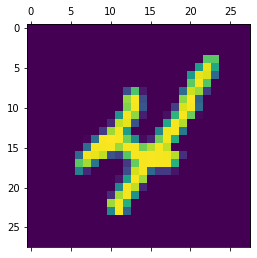

In [ ]:
plt.matshow(x_train[9])

In [ ]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalize to 0 to 1 range
x_train /= 255
x_test /= 255

#Designing model architecture using Keras

###Import Keras layers

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical, plot_model

##Compute the number of labels

In [ ]:
# compute the number of labels
num_labels = len(np.unique(y_train))

###**One** **Hot** **Encoding**

In [ ]:
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Building Models

In [ ]:
first_layer_size = 32
model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                25120     
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 10)                330       
                                                                 
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',
optimizer=RMSprop(),
metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,
batch_size=batch_size,epochs=epochs,verbose=1)


Epoch 1/2
469/469 [==============================] - 3s 6ms/step - loss: 1.6638 - accuracy: 0.5126
Epoch 2/2
469/469 [==============================] - 2s 4ms/step - loss: 0.6888 - accuracy: 0.8266


In [ ]:
# Print the predicted values and the corresponding digit
prediction = model.predict(x_test[10:11])
prediction = prediction[0]
print('Prediction\n',prediction)
print('\nThresholded output\n',(prediction>0.5)*1)

Prediction
 [8.56680453e-01 3.33969510e-04 3.48634049e-02 1.61327776e-02
 1.33603535e-04 7.41994753e-02 4.61042998e-03 2.16243701e-04
 1.27205821e-02 1.09170345e-04]

Thresholded output
 [1 0 0 0 0 0 0 0 0 0]


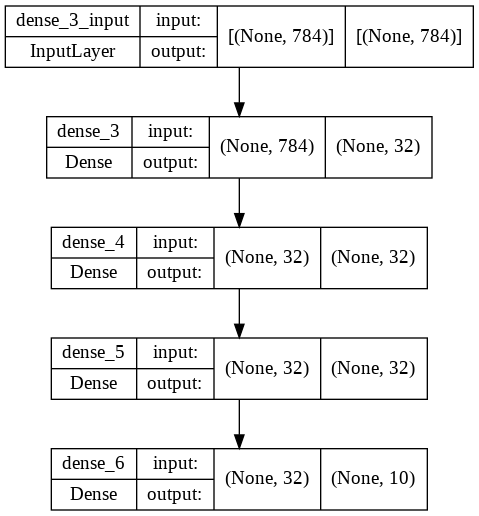

In [ ]:
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

#Explore

*   Number of Layers
*   Activation function
*   Layer-node configurations
*   optimizers
*   L1, L2 Regularization
*   Dropout Regularization
*   Different input sizes of the image
*   Dataset split

##Exploration by 1.Number of nodes

####Single hidden layer

In [ ]:
import keras.models

In [ ]:
modell = Sequential()
modell.add(Dense(32, activation='relu', input_shape=(784,)))
modell.add(Dense(32, activation='relu'))
modell.add(Dense(num_classes, activation='softmax'))
modell.summary()
print("----------------------------------------------------------------------------")
modell.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print("----------------------------------------------------------------------------")
history = modell.fit(x_train,y_train,
batch_size=128,
epochs=10,
verbose=2)
print("----------------------------------------------------------------------------")
score = modell.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("----------------------------------------------------------------------------")
prediction = modell.predict(x_test[10:11])
prediction = prediction[0]
print('Prediction\n',prediction)
print('\nThresholded output\n',(prediction>0.5)*1)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 32)                25120     
                                                                 
 dense_8 (Dense)             (None, 32)                1056      
                                                                 
 dense_9 (Dense)             (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________
----------------------------------------------------------------------------
----------------------------------------------------------------------------
Epoch 1/10
469/469 - 2s - loss: 0.4864 - accuracy: 0.8597 - 2s/epoch - 4ms/step
Epoch 2/10
469/469 - 1s - loss: 0.2183 - accuracy: 0.9374 - 1s/epoch - 3ms/step


In [ ]:
model1 = Sequential()
model1.add(Dense(2056, activation='relu', input_shape=(784,)))
model1.add(Dense(1028, activation='relu'))
model1.add(Dense(512, activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(4, activation='relu'))
model1.add(Dense(num_classes, activation='softmax'))
model1.summary()
print("------------------------------------------------------------------------------")
model1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print("------------------------------------------------------------------------------")
6
history = model1.fit(x_train,y_train,
batch_size=batch_size,
epochs=10,
verbose=2)
print("---------------------------Training and Testing Accuracy---------------------------------------------------")
score = model1.evaluate(x_test, y_test, verbose=2)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("------------------------------------------------------------------------------")
prediction = model1.predict(x_test[10:11])
prediction = prediction[0]
print('Prediction\n',prediction)
print('\nThresholded output\n',(prediction>0.5)*1)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 2056)              1613960   
                                                                 
 dense_11 (Dense)            (None, 1028)              2114596   
                                                                 
 dense_12 (Dense)            (None, 512)               526848    
                                                                 
 dense_13 (Dense)            (None, 128)               65664     
                                                                 
 dense_14 (Dense)            (None, 32)                4128      
                                                                 
 dense_15 (Dense)            (None, 4)                 132       
                                                                 
 dense_16 (Dense)            (None, 10)               

##2.Number of layers

####Model2 with  3 Hidden Layers with10 epochs

In [ ]:
model2 = Sequential()
model2.add(Dense(32, activation='relu', input_shape=(784,)))
model2.add(Dense(16, activation='relu'))
model2.add(Dense(8, activation='relu'))
model2.add(Dense(6, activation='relu'))
model2.add(Dense(4, activation='relu'))
model2.add(Dense(num_classes, activation='softmax'))
model2.summary()
print("------------------------------------------------------------------------------")
model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print("------------------------------------------------------------------------------")
history=model2.fit(x_train,y_train,
batch_size=batch_size,
epochs=10,
verbose=2)

print("------------------------------------------------------------------------------")
score = model2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("------------------------------------------------------------------------------")
prediction = model2.predict(x_test[10:11])
prediction = prediction[0]
print('Prediction\n',prediction)
print('\nThresholded output\n',(prediction>0.5)*1)

model2 with \4 hidden layers with 16, 8, 6 and 4 nodes, 30 epochs

In [ ]:
model2 = Sequential()
model2.add(Dense(32, activation='relu', input_shape=(784,)))
model2.add(Dense(16, activation='relu'))
model2.add(Dense(8, activation='relu'))
model2.add(Dense(6, activation='relu'))
model2.add(Dense(4, activation='relu'))
model2.add(Dense(num_classes, activation='softmax'))
model2.summary()
print("------------------------------------------------------------------------------")
model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print("------------------------------------------------------------------------------")
history=model2.fit(x_train,y_train,
batch_size=batch_size,
epochs=30,
verbose=2) #epoch=30

print("------------------------------------------------------------------------------")
score = model2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("------------------------------------------------------------------------------")
prediction = model2.predict(x_test[10:11])
prediction = prediction[0]
print('Prediction\n',prediction)
print('\nThresholded output\n',(prediction>0.5)*1)

Model2 with 4 hidden layers with 16, 8, 6 and 4 nodes , 30 epochs

In [ ]:
model2 = Sequential()
model2.add(Dense(32, activation='relu', input_shape=(784,)))
model2.add(Dense(16, activation='relu'))
model2.add(Dense(8, activation='relu'))
model2.add(Dense(6, activation='relu'))
model2.add(Dense(4, activation='relu'))
model2.add(Dense(num_classes, activation='softmax'))
model2.summary()
print("------------------------------------------------------------------------------")
model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print("------------------------------------------------------------------------------")
history=model2.fit(x_train,y_train,
batch_size=batch_size,
epochs=30,
verbose=2) #epoch=30

print("------------------------------------------------------------------------------")
score = model2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("------------------------------------------------------------------------------")
prediction = model2.predict(x_test[10:11])
prediction = prediction[0]
print('Prediction\n',prediction)
print('\nThresholded output\n',(prediction>0.5)*1)


####3.Activation function

####model3 with 3 hidden layers with each 32 nodes , epochs 10

In [ ]:
model3 = Sequential()
model3.add(Dense(32, activation='sigmoid', input_shape=(784,)))
model3.add(Dense(32, activation='sigmoid'))
model3.add(Dense(32, activation='sigmoid'))
model3.add(Dense(32, activation='sigmoid'))
model3.add(Dense(num_classes, activation='softmax'))
model3.summary()
print("----------------------------------------------------------------------------")
model3.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print("----------------------------------------------------------------------------")
history=model3.fit(x_train,y_train,batch_size=batch_size, epochs=10,verbose=2)
print("----------------------------------------------------------------------------")
score = model3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("----------------------------------------------------------------------------")
prediction = model3.predict(x_test[10:11])
prediction = prediction[0]
print('Prediction\n',prediction)
print('\nThresholded output\n',(prediction>0.5)*1)

####model3 with 3 hidden layers with relu, tanh activations, epochs 30

In [ ]:
model3 = Sequential()
model3.add(Dense(32, activation='sigmoid', input_shape=(784,)))
model3.add(Dense(32, activation='tanh'))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(32, activation='tanh'))
model3.add(Dense(num_classes, activation='softmax'))
model3.summary()
print("----------------------------------------------------------------------------")
model3.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print("----------------------------------------------------------------------------")
history1=model3.fit(x_train,y_train,batch_size=batch_size, epochs=30,verbose=2)␣

##epoch=30
print("----------------------------------------------------------------------------")
score = model3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("----------------------------------------------------------------------------")
prediction = model3.predict(x_test[10:11])
prediction = prediction[0]
print('Prediction\n',prediction)
print('\nThresholded output\n',(prediction>0.5)*1)

##4.Activation function combinations

####**model4** with 3 hidden layers with sigmoid and with 10 epochs

In [ ]:
model4 = Sequential()
model4.add(Dense(32, activation='sigmoid', input_shape=(784,)))
model4.add(Dense(32, activation='sigmoid'))
model4.add(Dense(32, activation='relu'))
model4.add(Dense(32, activation='tanh'))
model4.add(Dense(num_classes, activation='softmax'))
model4.summary()
print("----------------------------------------------------------------------------")
model4.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print("----------------------------------------------------------------------------")
history=model4.fit(x_train,y_train,batch_size=batch_size, epochs=10,verbose=2)
print("----------------------------------------------------------------------------")
score = model4.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("----------------------------------------------------------------------------")
prediction = model4.predict(x_test[10:11])
prediction = prediction[0]
print('Prediction\n',prediction)
print('\nThresholded output\n',(prediction>0.5)*1)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 32)                25120     
                                                                 
 dense_18 (Dense)            (None, 32)                1056      
                                                                 
 dense_19 (Dense)            (None, 32)                1056      
                                                                 
 dense_20 (Dense)            (None, 32)                1056      
                                                                 
 dense_21 (Dense)            (None, 10)                330       
                                                                 
Total params: 28,618
Trainable params: 28,618
Non-trainable params: 0
_________________________________________________________________
--------------------------------------------------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import tensorflow as tf
# Model a simple 3-layer neural network
model_3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model_3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_3.fit(train_images, train_labels, epochs=5, validation_split=0.2)